<a href="https://colab.research.google.com/github/pinoke98/Artificial_Intelligence/blob/main/SearchIACode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Metodo de busqueda a ciegas

In [ ]:
import pydot
from IPython.display import Image, display
import queue
import numpy as np

# Clase Node, para representar los nodos del árbol de búsqueda

Esta clase, es una clase general para represetar el problema y a la vez los nodos de un árbol.

Para un problema específico se creará una clase que herede de esta.

Tiene como atributos o propiedades:
-  **state**: estado del nodo, que en dependencia del problema debe tener una representación específica
- **value**: este atributo puede servir para darle un valor(id) que identifique a cada nodo
- **children**: es un arreglo de los nodos hijos
- **parent**: El padre, o sea, el nodo que lo generó
- **operator**: El operador que lo generó
- **operators**: Los posibles operadores a aplicar (aunque en este caso, para saber el número del operdor, es una lista con todos los operados)
- **objective**: estado objetivo a llegar
- **level**: El nivel de profundidad del nodo, en el árbol

Como métodos se tienen:
- **add_child**: Que adiciona un hijo en la lista children, en este caso se pasan los parámetros del nodo, éste se crea y se adiciona a la lista.

- **add_node_child**: Parecido al anterior, sólo que se pasa como parámetro el nodo ya creado y sólo se adiciona a la lista children.

- **getchildrens**: Método que devuelve la lista de hijos al aplicar los operadores.

- **getState**: Método abstracto que deben implementar los problemas que hereden de Node, para definir lo que hace cada uno de los operadores. Este método devuelve el estado que se obtiene al aplicar el operador en la posición index del arreglo operators.

- **repeatStatePath**: Este método devuelve un booleano en dependencia de si el estado que se pasa está ya en el camino a la raíz. Verdadero si está, Falso sin no está. Esto es para evitar ciclos y caminos infinitos.

- **pathObjective**: Este método devuelve el camino hasta la raíz. Útil para buscar el camino cuando se encuentra el estado objetivo.

- **printPath**: Este método imprime la solución. Puede sobreescribirse en las clases que hereden de esta para imprimir la solución como se desee.

- **heuristic**: Este método se debe definir en las clases que hereden de ésta, definiendo el cálculo de la heurística en cada estado (nodo).

- **cost**:  Este método también debe definirse en las clases que hereden de ésta, definiendo el costo de cada operador para generar un nuevo estado.

- **f**: Esta es la función f usada en el algoritmo A* que es la suma del costo y la heurística (cost + heuristic)

In [ ]:
class Node():

  def __init__(self, state, value, operators,operator = None, parent = None, objective = None):
    self.state = state
    self.value = value
    self.children = []
    self.parent = parent
    self.operator = operator
    self.operators = operators
    self.objective = objective
    self.level = 0

  def add_child(self, value, state, operator):
    node = type(self)(value = value, state = state, operator = operator, parent = self, operators = self.operators)
    node.level = node.parent.level+1
    self.children.append(node)
    return node

  def add_node_child(self, node):
    node.level = node.parent.level+1
    self.children.append(node)
    return node

  #Returns all of the states depending on the operators applied
  def getchildren(self):
    return [
            self.getState(i)
              if not self.repeatStatePath(self.getState(i))
                else None for i, op in enumerate(self.operators)]
                
  def getState(self, index):
    pass

  def __eq__(self, other):#It let me to compare two nodes to see if they are equal
    return self.state == other.state

  def __lt__(self, other):#It let me to compare two nodes to see if one is less than the other
    return self.f() < other.f()

  def repeatStatePath(self, state):
    n = self
    while n is not None and n.state!=state:
      n=n.parent
    return n is not None
  
  def pathObjective(self):
    n = self
    result = []
    while n is not None:
      result.append(n)
      n = n.parent
    return result
  
  def printPath(self):
    stack = self.pathObjective()
    while len(stack)!=0:
      node = stack.pop()
      if node.operator is not None:
        print(f'operator: {operators[node.operator]} \t estado: {node.state}')
      else:
        print(f' {node.state}')
    
  def heuristic(self):
    return 0
  
  def cost(self):
    return 1

  def f(self):
    return self.cost() + self.heuristic()


#Busqueda Primero a lo ancho

In [ ]:
  def BPA (root, startState, endState):
    pq = queue.Queue()
    pq.put(root)
    while not pq.empty():
      node = pq.get()
      children = node.getchildren()
      for i, child in enumerate(children):
        if child is not None:
          newChild = node.add_child(value =  node.value+'-'+str(i), state = child, operator = i)
          pq.put(newChild)
          if endState == child:
            return (root, newChild)

#Busqueda primero en profundidad

In [ ]:
def BPP(root, startState , endState):
  pq=[]
  pq.append(root)    
  while len(pq)>0:
    node=pq.pop()
    if (node.parent is not None):
      node.parent.add_node_child(node)
    children=node.getchildren()
    temp=[]
    for i,child in enumerate(children):
      if child is not None:
        newChild=type(root)(value=node.value+'-'+str(i),state=child, operator=i,
                            parent=node, operators=node.operators)
        temp.append(newChild)
        if endState==child:
          node.add_node_child(newChild)
          return (root, newChild) 
    #Adicionar los hijos en forma inversa para que salga primero el primero que se adicionó
    temp.reverse()
    for e in temp:
      pq.append(e)


#Dibujar el Arbol

In [ ]:
def draw(root,path):
  graph = pydot.Dot(graph_type='graph')
  nodeGraph=pydot.Node(str(root.state)+"-"+str(0),
                        label=str(root.state),shape ="circle", 
                        style="filled", fillcolor="red")
  graph.add_node(nodeGraph)
  path.pop()
  return drawTreeRec(root,nodeGraph,graph,0,path.pop(),path)
    
def drawTreeRec(root,rootGraph,graph,i,topPath,path):
  if root is not None:
    children=root.children
    for j,child in enumerate(children):
      i=i+1
      color="white"
      if topPath.value==child.value:
        if len(path)>0:topPath=path.pop()
        color='red'
      if child.heuristic() is None: 
        h="" 
      else: 
        h='h='+str(child.heuristic())
      c=pydot.Node(child.value,label=str(child.state)+r"\n"+h+r"\n"+"f="+str(child.f()), 
                    shape ="circle", style="filled", 
                    fillcolor=color)
      graph.add_node(c)
      graph.add_edge(pydot.Edge(rootGraph, c, 
                                label=str(child.operator)+'('+str(child.cost())+')'))
      graph=drawTreeRec(child,c,graph,i,topPath,path)  # recursive call
    return graph
  else:
    return graph 

#Ejemplo Jarra
Se tiene una jarra de 4L y una de 3L, las jarras no tienen medidas ni forma de medir la cantidad, sólo se puede saber la medida a la máxima capacidad.
Se cuenta con un vertedero y una llave de agua. Las jarras se pueden llenar hasta la máxima capacidad, vaciar o trasvasar de una a otra.
Se quiere obtener 2L en la jarra de 4L.

Teniendo en cuenta este problema, se puede definir el estado como:
**(cantidad jarra de 3L, cantidad jarra de 4L)**

Y los operadores como:

>0-  llenar jarra de 3 litros

>1-  llenar jarra de 4 litros

>2-  vaciar jarra de 3 litros

>3-  vaciar jarra de 4 litros

>4-  trasvasar de 3L a 4L

>5-  trasvasar de 4L a 3L


Aquí se implementa el método **getState** para definir la acción en cada operador, o sea, cuáles son los estados después de aplicar cada operador. Se devuelve el resultado para el operador en la posición index.

Se pueden definir varias heurísticas.

**Ejemplo de Heurística**: Distancia entre el estado del nodo actual y el objetivo. Esta distancia la podemos medir por cuán lejos está cada elemento del estado del final. Lo cual puede ser tan simple como la resta en valor absoluto de estas cantidades. Y devolver la suma de estas dos diferencias.
Seas nodoActual=(Distancia_Jarra3L, Distancia_Jarra4L) y
nodoObjetivo=(Distancia_JarraeL, Distancia_Jarra4L).

*heurística= abs(nodoObjetivo[0]-nodoActual[0])+ abs(nodoObjetivo[1]-nodoActual[1])*

**Ejemplo de costo**: Como costo podemos definir el nivel del árbol (*level*), ya que incluso queremos minimizar la cantidad de pasos a realizar.



In [ ]:
class Jarra(Node): 
  
  def getState(self, index):
    state=self.state
    nextState=None
    if index==0: 
      if state[0]<3: 
        nextState=[3,state[1]] 
      else:
        nextState=None
    elif index==1: 
      if state[1]<4: 
        nextState=[state[0],4]
      else:
        nextState=None
    elif index==2: 
      if state[0]>0: 
        nextState=[0,state[1]] 
      else:
        nextState=None
    elif index==3: 
      if state[1]>0: 
        nextState=[state[0],0] 
      else:
        nextState=None
    elif index==4: nextState=self.trasvasar3L4L(state)
    elif index==5: nextState=self.trasvasar4L3L(state)
    return nextState if state!=nextState else None

  def trasvasar4L3L(self, state):
    t=min(3-state[0],state[1])
    return [state[0]+t,state[1]-t]
  
  def trasvasar3L4L(self, state):
    t=min(state[0],4-state[1])
    return [state[0]-t,state[1]+t]
  
  def heuristic(self):
    r1=abs(objective.state[0]-self.state[0])+abs(objective.state[1]-self.state[1])
    return r1 
  
  #Costo acumulativo(valor 1 en cada nivel)
  def cost(self):
    return self.level

In [ ]:
operators=['0- llenar jarra de 3 litros','1- llenar jarra de 4 litros',
           '2- vaciar jarra de 3 litros',
           '3- vaciar jarra de 4 litros',
           '4- trasvasar de 3-4',
           '5- trasvasar de 4-3']
initState=[0,0]
endState=[0,2]

 [0, 0]
operator: 0- llenar jarra de 3 litros 	 estado: [3, 0]
operator: 1- llenar jarra de 4 litros 	 estado: [3, 4]
operator: 2- vaciar jarra de 3 litros 	 estado: [0, 4]
operator: 5- trasvasar de 4-3 	 estado: [3, 1]
operator: 2- vaciar jarra de 3 litros 	 estado: [0, 1]
operator: 5- trasvasar de 4-3 	 estado: [1, 0]
operator: 1- llenar jarra de 4 litros 	 estado: [1, 4]
operator: 5- trasvasar de 4-3 	 estado: [3, 2]
operator: 2- vaciar jarra de 3 litros 	 estado: [0, 2]


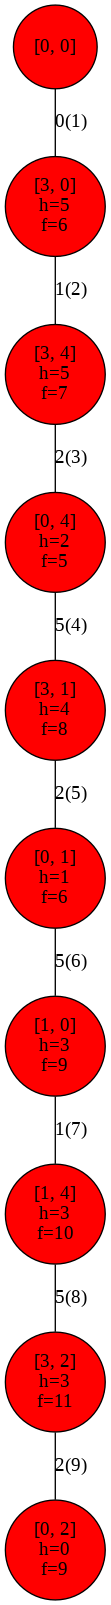

In [ ]:
jarra=Jarra(value="inicio",state=initState,operators=operators)
(tree, objective)= BPP(jarra,initState,endState)
path=objective.pathObjective()
objective.printPath()
graph=draw(tree, path)
tree_image = Image(graph.create_png(), width=100, height=700)
display(tree_image)

 [0, 0]
operator: 0- llenar jarra de 3 litros 	 estado: [3, 0]
operator: 4- trasvasar de 3-4 	 estado: [0, 3]
operator: 0- llenar jarra de 3 litros 	 estado: [3, 3]
operator: 4- trasvasar de 3-4 	 estado: [2, 4]
operator: 3- vaciar jarra de 4 litros 	 estado: [2, 0]
operator: 4- trasvasar de 3-4 	 estado: [0, 2]


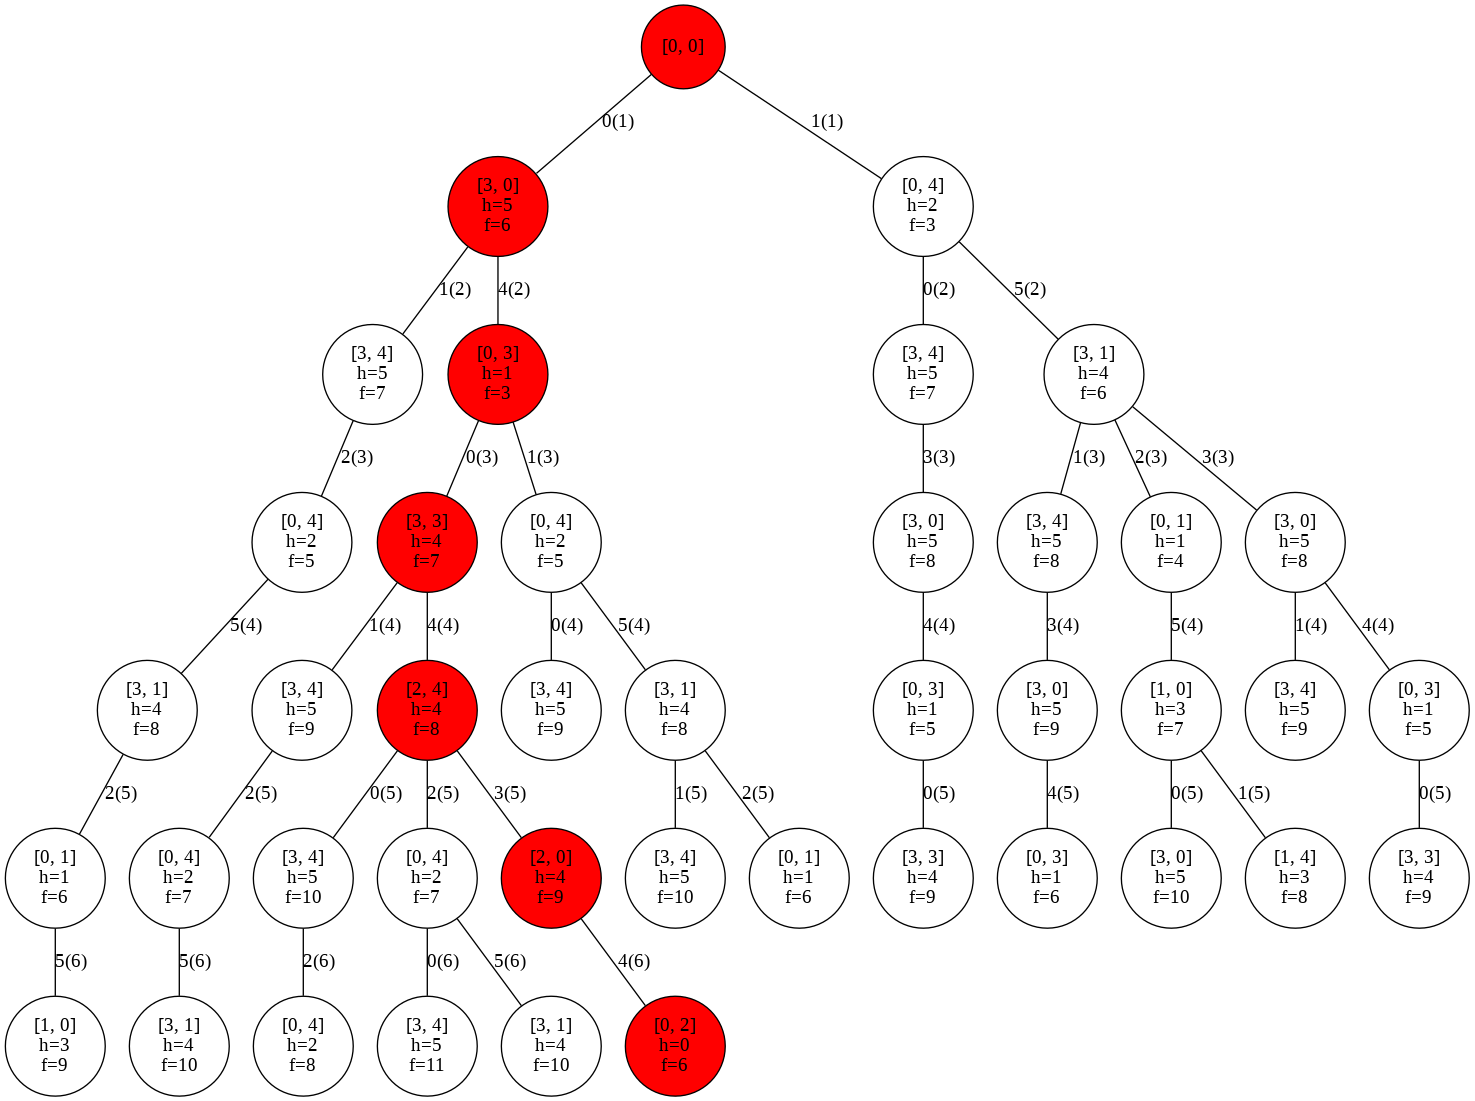

In [ ]:
jarra=Jarra(value="inicio",state=initState,operators=operators)
(tree, objective)= BPA(jarra,initState,endState)
path=objective.pathObjective()
objective.printPath()
graph=draw(tree, path)
tree_image = Image(graph.create_png(), width=900, height=700)
display(tree_image)

#Best First

In [ ]:
def bestFirst (root, startState, endState):
  pq = queue.PriorityQueue()
  pq.put((root.heuristic(),root))
  while not pq.empty():
    node = pq.get()[1]
    children = node.getchildren()
    for i, child in enumerate(children):
      if child is not None:
        newChild = node.add_child(value =  node.value+'-'+str(i), state = child, operator = i)
        pq.put((newChild.heuristic(),newChild))
        if endState == child:
          return (root, newChild)


 [0, 0]
operator: 1- llenar jarra de 4 litros 	 estado: [0, 4]
operator: 5- trasvasar de 4-3 	 estado: [3, 1]
operator: 2- vaciar jarra de 3 litros 	 estado: [0, 1]
operator: 5- trasvasar de 4-3 	 estado: [1, 0]
operator: 1- llenar jarra de 4 litros 	 estado: [1, 4]
operator: 5- trasvasar de 4-3 	 estado: [3, 2]
operator: 2- vaciar jarra de 3 litros 	 estado: [0, 2]


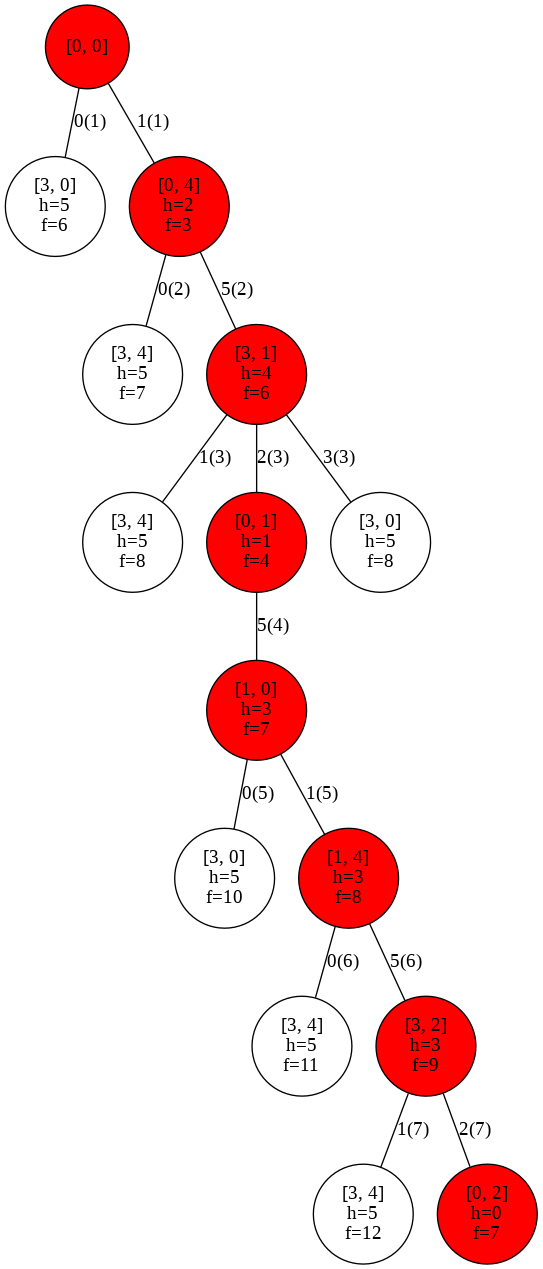

In [ ]:
jarra=Jarra(value="inicio",state=initState,operators=operators)
(tree, objective)= bestFirst(jarra,initState,endState)
path=objective.pathObjective()
objective.printPath()
graph=draw(tree, path)
tree_image = Image(graph.create_png(), width=500, height=700)
display(tree_image)

#A*

In [ ]:
def A_asterisk (root, startState, endState):
  pq = queue.PriorityQueue()
  pq.put((root.f(),root))
  while not pq.empty():
    node = pq.get()[1]
    children = node.getchildren()
    for i, child in enumerate(children):
      if child is not None:
        newChild = node.add_child(value =  node.value+'-'+str(i), state = child, operator = i)
        pq.put((newChild.f(),newChild))
        if endState == child:
          return (root, newChild)

 [0, 0]
operator: 0- llenar jarra de 3 litros 	 estado: [3, 0]
operator: 4- trasvasar de 3-4 	 estado: [0, 3]
operator: 0- llenar jarra de 3 litros 	 estado: [3, 3]
operator: 4- trasvasar de 3-4 	 estado: [2, 4]
operator: 3- vaciar jarra de 4 litros 	 estado: [2, 0]
operator: 4- trasvasar de 3-4 	 estado: [0, 2]


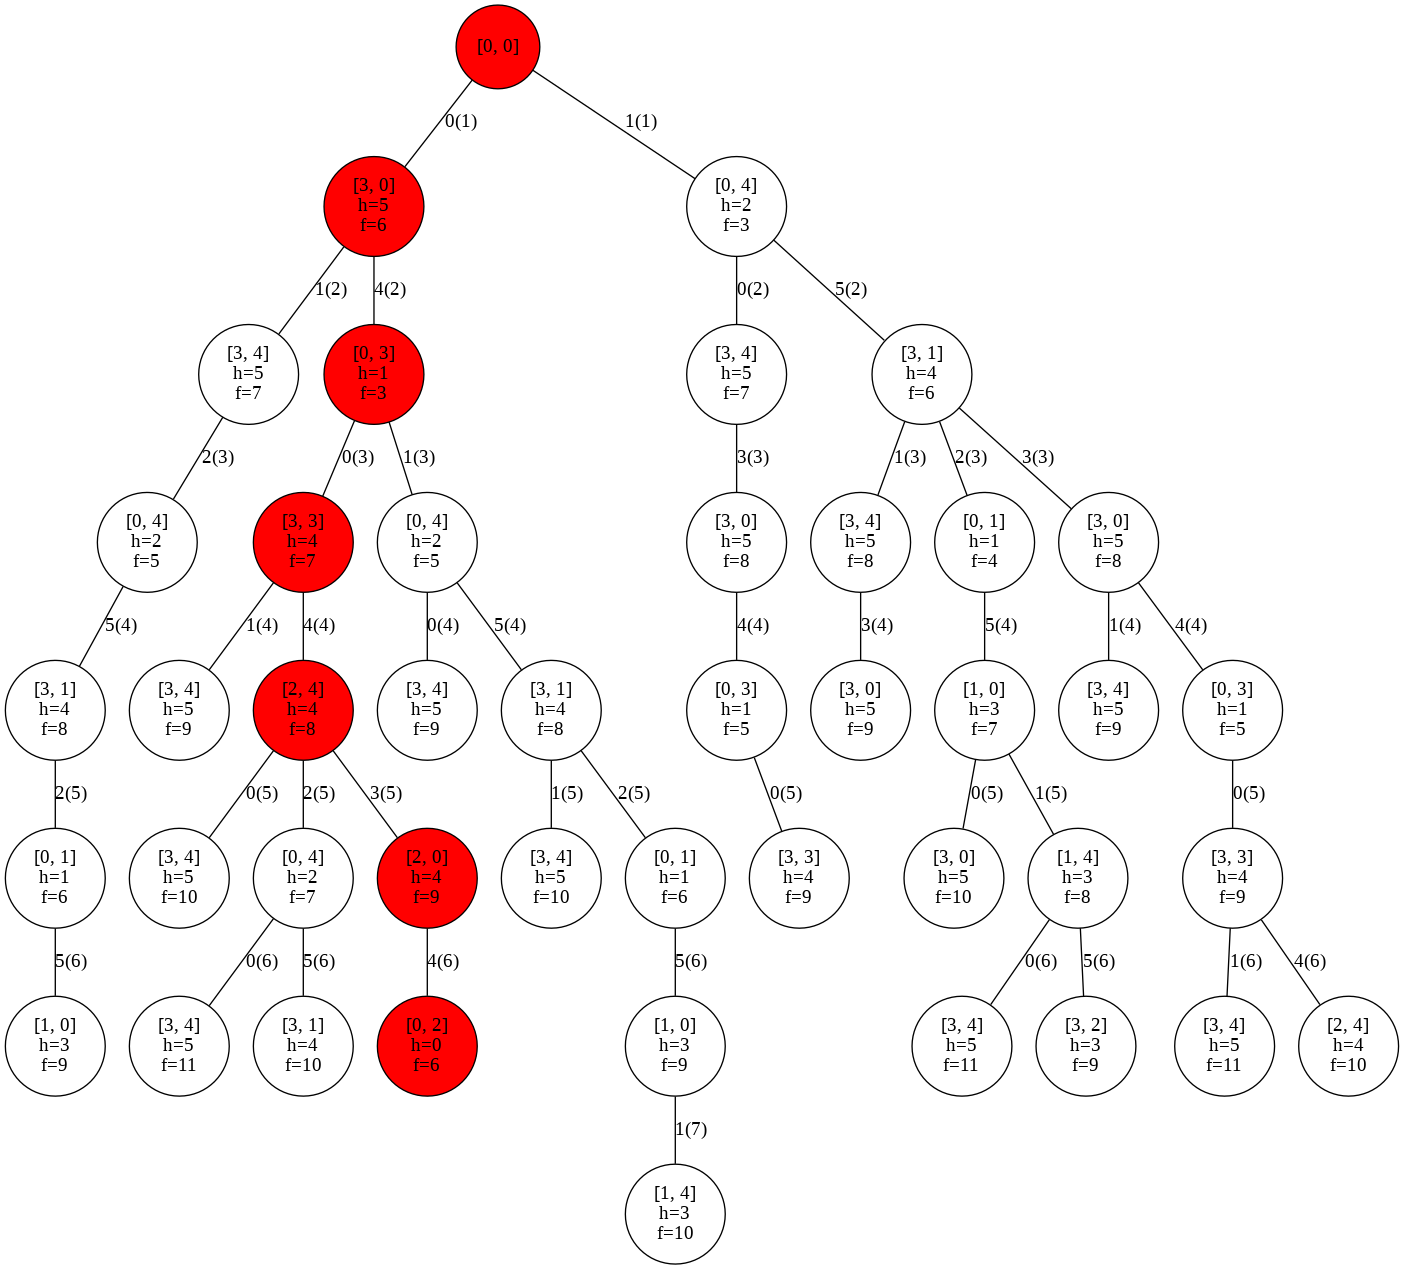

In [ ]:
jarra=Jarra(value="inicio",state=initState,operators=operators)
(tree, objective)= A_asterisk(jarra,initState,endState)
path=objective.pathObjective()
objective.printPath()
graph=draw(tree, path)
tree_image = Image(graph.create_png(), width=900, height=700)
display(tree_image)

#Ciudades

In [ ]:
romania_map=dict(
    Arad=dict(Zerind=75, Sibiu=140, Timisoara=118),
    Bucharest=dict(Urziceni=85, Pitesti=101, Giurgiu=90, Fagaras=211),
    Craiova=dict(Drobeta=120, Rimnicu=146, Pitesti=138),
    Drobeta=dict(Mehadia=75),
    Eforie=dict(Hirsova=86),
    Fagaras=dict(Sibiu=99),
    Hirsova=dict(Urziceni=98),
    Iasi=dict(Vaslui=92, Neamt=87),
    Lugoj=dict(Timisoara=111, Mehadia=70),
    Oradea=dict(Zerind=71, Sibiu=151),
    Pitesti=dict(Rimnicu=97),
    Rimnicu=dict(Sibiu=80),
    Urziceni=dict(Vaslui=142))

In [ ]:
state = 'Rimnicu'
keys = [key for key in romania_map]
adj = []
if state in keys:
  adj = [(key,romania_map[state][key]) for key in romania_map[state]]

cities = [keys for keys in romania_map]
for c in cities:
  k = [k for k in romania_map[c]]
  if state in k:
    adj.append((c,romania_map[c][state]))
adj


[('Sibiu', 80), ('Craiova', 146), ('Pitesti', 97)]

In [ ]:
aerial_distance_Bucharest=dict(
    Arad=366,
    Craiova=160,
    Dobreta=242,
    Eforie=161,
    Fagaras=178,
    Giurgiu=77,
    Hirsora=151,
    Iasi=226,
    Lugoj=224,
    Mehadia=241,
    Neamt=234,
    Oradea=380,
    Pitesti=98,
    Rimnicu=193,
    Sibiu=253,
    Timisoara=329,
    Urziconi=80,
    Vaslui=199,
    Zerind=374)

In [ ]:
initState='Arad'
endState='Bucharest'

operators=[op for op in aerial_distance_Bucharest]
operators.append(endState)
operators.sort()
operators

['Arad',
 'Bucharest',
 'Craiova',
 'Dobreta',
 'Eforie',
 'Fagaras',
 'Giurgiu',
 'Hirsora',
 'Iasi',
 'Lugoj',
 'Mehadia',
 'Neamt',
 'Oradea',
 'Pitesti',
 'Rimnicu',
 'Sibiu',
 'Timisoara',
 'Urziconi',
 'Vaslui',
 'Zerind']

In [ ]:
class RouteMap(Node):

  mapAdj = None
  distanceA = None

  def __init__(self, mapAdj = None, distanceA = None, **kwargs):
    super(RouteMap,self).__init__(**kwargs)
    if mapAdj is not None:
      RouteMap.mapAdj = mapAdj
    if distanceA is not None:
      RouteMap.distanceA = distanceA
    self.adj = self.adj()
    

  def adj(self):
    keys = [key for key in romania_map]
    adj = []
    if self.state in keys:
      adj = [(key,romania_map[self.state][key]) for key in romania_map[self.state]]
    cities = [keys for keys in romania_map]
    for c in cities:
      k = [k for k in romania_map[c]]
      if self.state in k:
        adj.append((c,romania_map[c][self.state]))
    adj_nroot = [a if not self.repeatStatePath(a) else None for a in adj]
    return adj_nroot
  
  def getState(self, index):
    if len(self.adj) > 0:
      for city, d in self.adj:
        if self.operators[index] == city:
          return self.operators[index]
    return None
  
  def heuristic(self):
    if self.state not in RouteMap.distanceA: return 0
    return RouteMap.distanceA[self.state]
  
  def cost(self):
    if self.parent is not None:
      for a in self.parent.adj:
        if a[0] == self.state:
          cost = self.parent.cost() + a[1]
    else:
      cost = 0
    return cost


 Arad
operator: Sibiu 	 estado: Sibiu
operator: Fagaras 	 estado: Fagaras
operator: Bucharest 	 estado: Bucharest


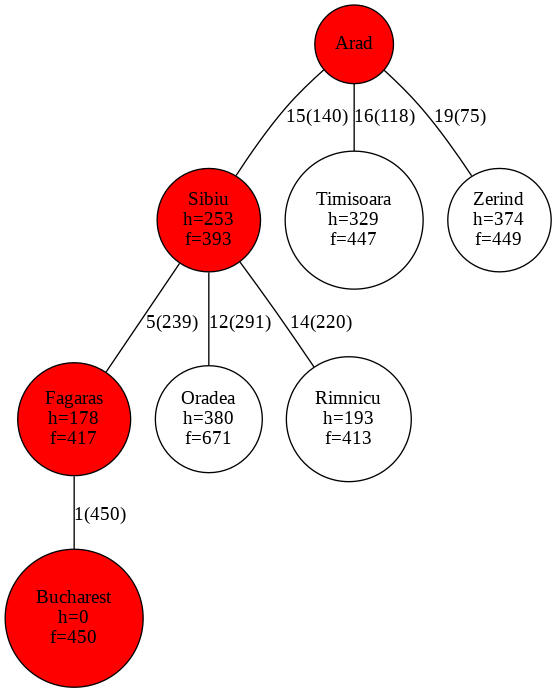

In [ ]:
routeAradBucharest=RouteMap(mapAdj=romania_map, distanceA=aerial_distance_Bucharest,value="inicio",state=initState,operators=operators)
(tree, objective)= bestFirst(routeAradBucharest,initState,endState)
path=objective.pathObjective()
objective.printPath()
graph=draw(tree, path)
tree_image = Image(graph.create_png(), width=600, height=400)
display(tree_image)